In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%config IPCompleter.greedy=True

In [3]:
dt=DecisionTreeClassifier(max_depth=5,min_samples_split=4)

In [7]:
df=pd.read_clipboard(sep=',')

In [8]:
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [11]:
df.isnull().sum()

sex      0
exang    0
num      0
dtype: int64

In [19]:
X=df.drop(columns='num')
y=df.num

In [35]:
clf=DecisionTreeClassifier(criterion='entropy')

In [36]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

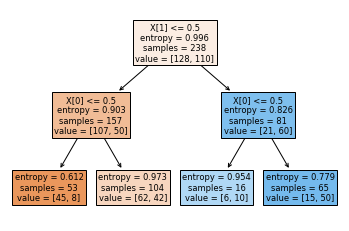

In [37]:
tree.plot_tree(clf, filled=True);

In [31]:
0.996-(123/2+110/2)/238

0.5065042016806722

In [52]:
import math
math.log2(128/238) *(-128/238)+math.log2(110/238) *(-110/238)

0.9958699965528488

In [94]:
clf.tree_.impurity[0]
clf.tree_.n_node_samples

array([238, 157,  53, 104,  81,  16,  65], dtype=int64)

# IG

In [88]:
IG=clf.tree_.impurity[0]-\
    clf.tree_.impurity[1]*clf.tree_.n_node_samples[1]/clf.tree_.n_node_samples[0]\
    -clf.tree_.impurity[4]*clf.tree_.n_node_samples[4]/clf.tree_.n_node_samples[0]
IG

0.11939340343891597

In [95]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
r_node = clf.tree_.children_right[0] # индекс корня правого поддерева

n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
n2 = clf.tree_.n_node_samples[r_node] # сэмплов в правом поддереве

e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
e2 = clf.tree_.impurity[r_node] # энтропия в корне правого поддерева

n = clf.tree_.n_node_samples[0] # суммарное кол-во сэмплов
e = clf.tree_.impurity[0] # энтропия корня дерева

average_child_enthropy = (e1*n1/n) + (e2*n2/n)

information_gain = e - average_child_enthropy
information_gain

0.11939340343891591

In [97]:
 clf.tree_.children_right[0]

4

# Iris Tree


In [99]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [110]:
type(iris)

sklearn.utils.Bunch

In [112]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)

In [113]:
clf=DecisionTreeClassifier()

In [114]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
predicted=clf.predict(X_test)

# GRIDSEARCH

In [120]:
from sklearn.model_selection import GridSearchCV

In [149]:
parametrs={'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
search=GridSearchCV(clf, parametrs)

In [150]:
search.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                    

In [152]:
search.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [153]:
best_tree=search.best_estimator_

In [154]:
best_tree 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [140]:
search.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__presort': False,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': {'max_depth':

# RandomizedSearchCV

In [157]:

from sklearn.model_selection import RandomizedSearchCV

clf=DecisionTreeClassifier()
clf.fit(X,y)
parametrs={'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
search=RandomizedSearchCV(clf, parametrs)
search.fit(X,y)
best_tree=search.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
